<a href="https://colab.research.google.com/github/DhawalV1/Computational_Neuroscience/blob/main/PCA_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Either follow the code below or this link [PCA on Neuroimage](https://bic-berkeley.github.io/psych-214-fall-2016/pca_solution.html)

Click on this to get the [ds114_sub009_t2r1.nii](https://bic-berkeley.github.io/psych-214-fall-2016/_downloads/6a7796486499152f0bd6ac9cd119ddc1/ds114_sub009_t2r1.nii)

In [95]:
#: import common modules
import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package
# Display array values to 6 digits of precision
np.set_printoptions(precision=4, suppress=True)

In [96]:
import numpy.linalg as npl

In [97]:
import nibabel as nib

In [98]:
img = nib.load('ds114_sub009_t2r1.nii')

In [99]:
data = img.get_fdata()

In [100]:
data.shape

(64, 64, 30, 173)

In [101]:
vol_shape = data.shape[:-1]
vol_shape

(64, 64, 30)

In [102]:
n_vols = data.shape[-1]

In [103]:
first_two = data[..., :2]
first_two.shape

(64, 64, 30, 2)

In [104]:
N = np.prod(vol_shape)

In [105]:
first_two = first_two.reshape((N, 2))

In [106]:
first_two = first_two.T

In [107]:
row_means = np.mean(first_two, axis=1)

In [108]:
row_means = np.outer(row_means,np.ones(N))

In [109]:
X = first_two - row_means

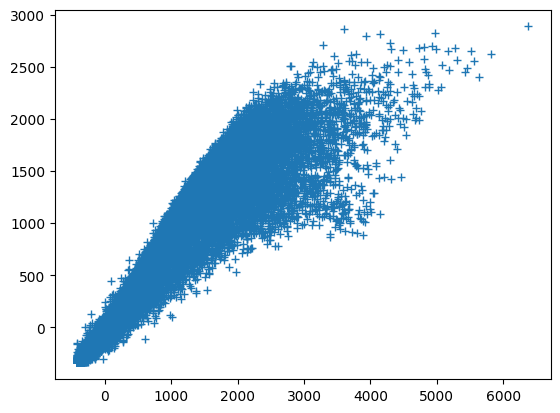

In [110]:
plt.plot(X[0], X[1], '+')

In [111]:
unscaled_covariance = X.dot(X.T)

In [112]:
U, S, VT = npl.svd(unscaled_covariance)

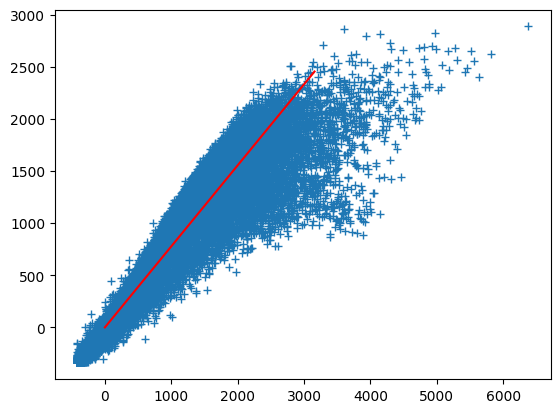

In [113]:
plt.plot(X[0], X[1], '+')

scaled_u = U[0, :] * -4000
plt.plot([0, scaled_u[0]], [0, scaled_u[1]], 'r')
plt.show()

In [114]:
scaled_u = U[0, :] * -4000

In [115]:
scaled_u[0]

3157.939573700701

In [116]:
C = U.T.dot(first_two)

In [117]:
C_vols = C.T.reshape(vol_shape + (2,))

In [118]:
vol0 = C_vols[..., 0]
vol1 = C_vols[..., 1]

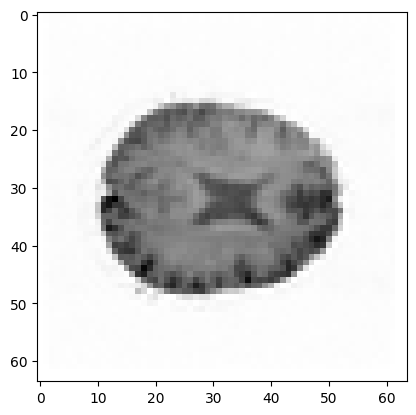

In [119]:
# for i in range(20):
#     plt.imshow(vol0[:, :, i], cmap='gray')
#     plt.show()
plt.imshow(vol0[:, :, 15], cmap='gray')


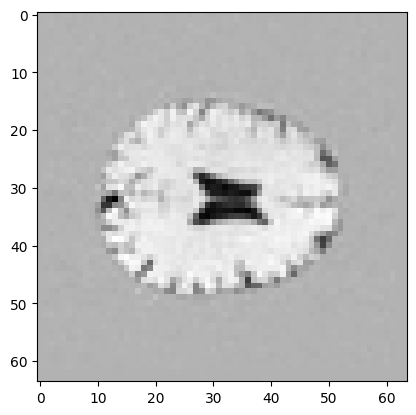

In [120]:
plt.imshow(vol1[:, :, 15], cmap='gray')

In [121]:
arr = data.reshape(N, n_vols).T

In [122]:
row_means = np.outer(np.mean(arr, axis=1), np.ones(N))
X = arr - row_means

In [123]:
unscaled_covariance = X.dot(X.T)
unscaled_covariance.shape

(173, 173)

In [124]:
U, S, VT = npl.svd(unscaled_covariance)

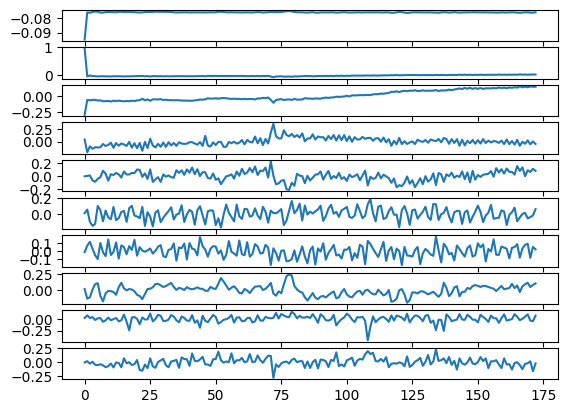

In [154]:
 fig, axes = plt.subplots(10, 1)
 for i, ax in enumerate(axes):
  ax.plot(U[:, i])

In [126]:
C = U.T.dot(X)

In [127]:
C.shape

(173, 122880)

In [128]:
C_vols = C.T.reshape(img.shape)

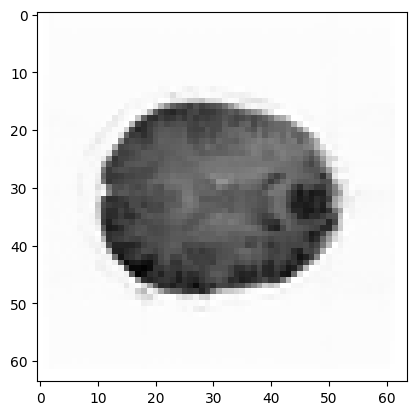

In [150]:
plt.imshow(C_vols[:, :, 14,0], cmap='gray')

In [130]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio

In [131]:

# Get the data as a numpy array

img = nib.load('ds114_sub009_t2r1.nii')
data = img.get_fdata()
# Assume the 3D array is structured as [time, x, y] or [time, x, y, z]
# If it's 4D (e.g., [time, height, width, depth]), slice it accordingly.
# For now, let's assume it's [time, height, width]

# Example: Select one slice per time step (e.g., middle slice if 4D)
time_steps = data.shape[3]  # Number of time points

# Create a list to store frames
frames = []

# Iterate through each time point
for t in range(time_steps):
    # Select a 2D slice (for example, a specific z-plane if 4D)
    # Here, we assume a 3D file (time, height, width). If it's 4D, select a specific depth slice.
    slice_2d = data[:, :, 0,t]  # Modify this if you have more dimensions

    # Normalize the image for display purposes (scale between 0 and 255)
    slice_2d = (slice_2d - np.min(slice_2d)) / (np.max(slice_2d) - np.min(slice_2d)) * 255
    slice_2d = slice_2d.astype(np.uint8)

    # Plot the image slice
    fig, ax = plt.subplots()
    ax.imshow(slice_2d, cmap='gray')  # Show the 2D image slice
    plt.axis('off')
    plt.tight_layout()

    # Convert the matplotlib figure to an image frame
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # Append the frame to the list
    frames.append(Image.fromarray(frame))

    plt.close(fig)

# Save the frames as a GIF
frames[0].save('output.gif', save_all=True, append_images=frames[1:], duration=500, loop=0)  # 2 fps = 500 ms per frame


In [132]:
import nibabel as nib
import numpy as np
import cv2

# Load the .nii file
nii_file = 'ds114_sub009_t2r1.nii'
img = nib.load(nii_file)

# Get the data as a numpy array
data = img.get_fdata()

# Assume the 3D array is structured as [time, height, width]
# If it's 4D, slice it accordingly (e.g., select a depth slice)
time_steps = data.shape[3]  # Number of time points

# Create VideoWriter object (output video file, codec, fps, frame size)
frame_shape = data[:, :, :,0].shape  # Assuming 3D time series data
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 2, (frame_shape[1], frame_shape[0]))

# Iterate through each time point and add frames
for t in range(time_steps):
    # Select a 2D slice for each time step
    slice_2d = data[:, :, 0,t]

    # Normalize the slice for better contrast (0-255)
    slice_2d = (slice_2d - np.min(slice_2d)) / (np.max(slice_2d) - np.min(slice_2d)) * 255
    slice_2d = slice_2d.astype(np.uint8)

    # Convert the slice to BGR format (required for OpenCV)
    frame = cv2.cvtColor(slice_2d, cv2.COLOR_GRAY2BGR)

    # Write the frame to the video
    out.write(frame)

# Release the video writer
out.release()
